In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

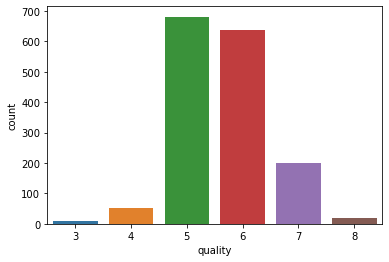

In [25]:
sns.countplot(x= 'quality', data = data)

In [5]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [16]:
data['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [17]:
data_correlation = data.corr()

In [18]:
data_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

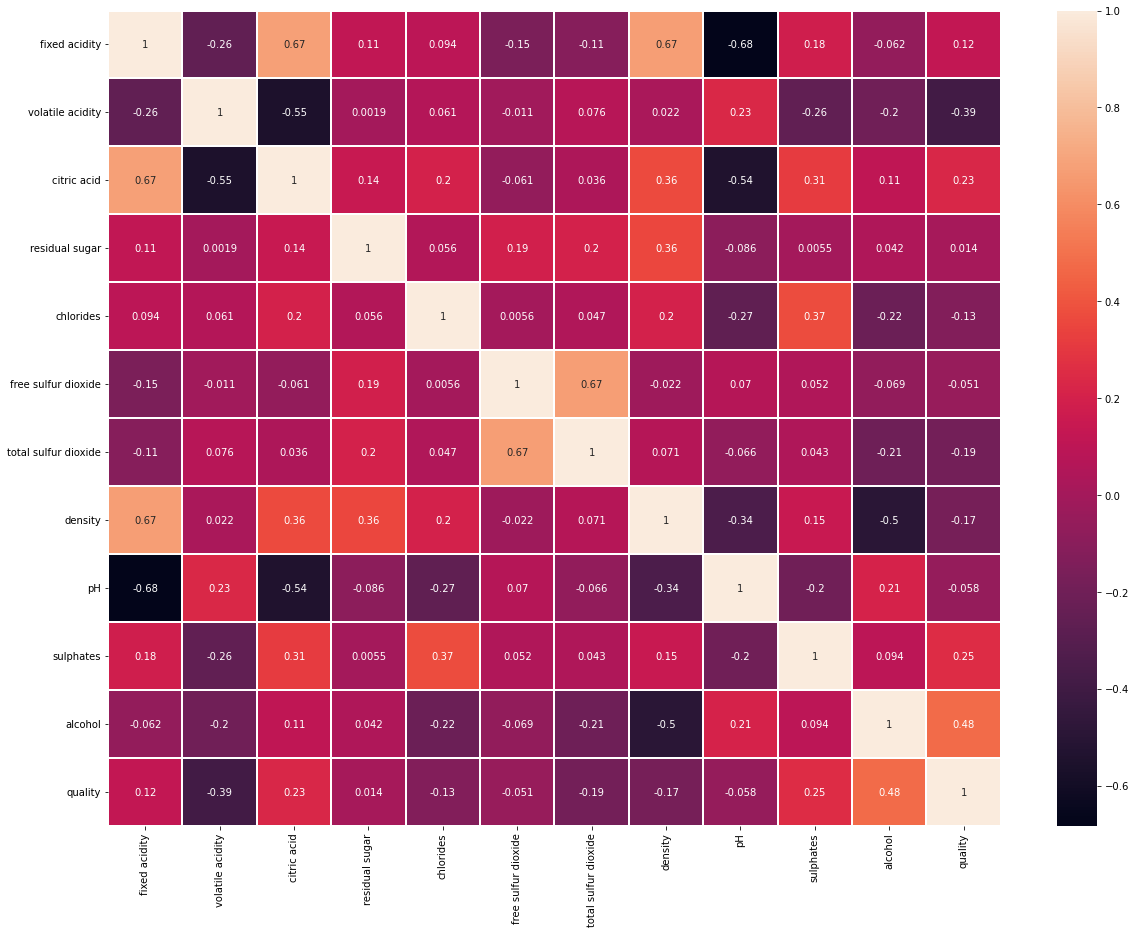

In [24]:
plt.figure(figsize = (20, 15))
sns.heatmap(data = data_correlation, annot = True, linewidth = 0.10)

In [26]:
data_correlation['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

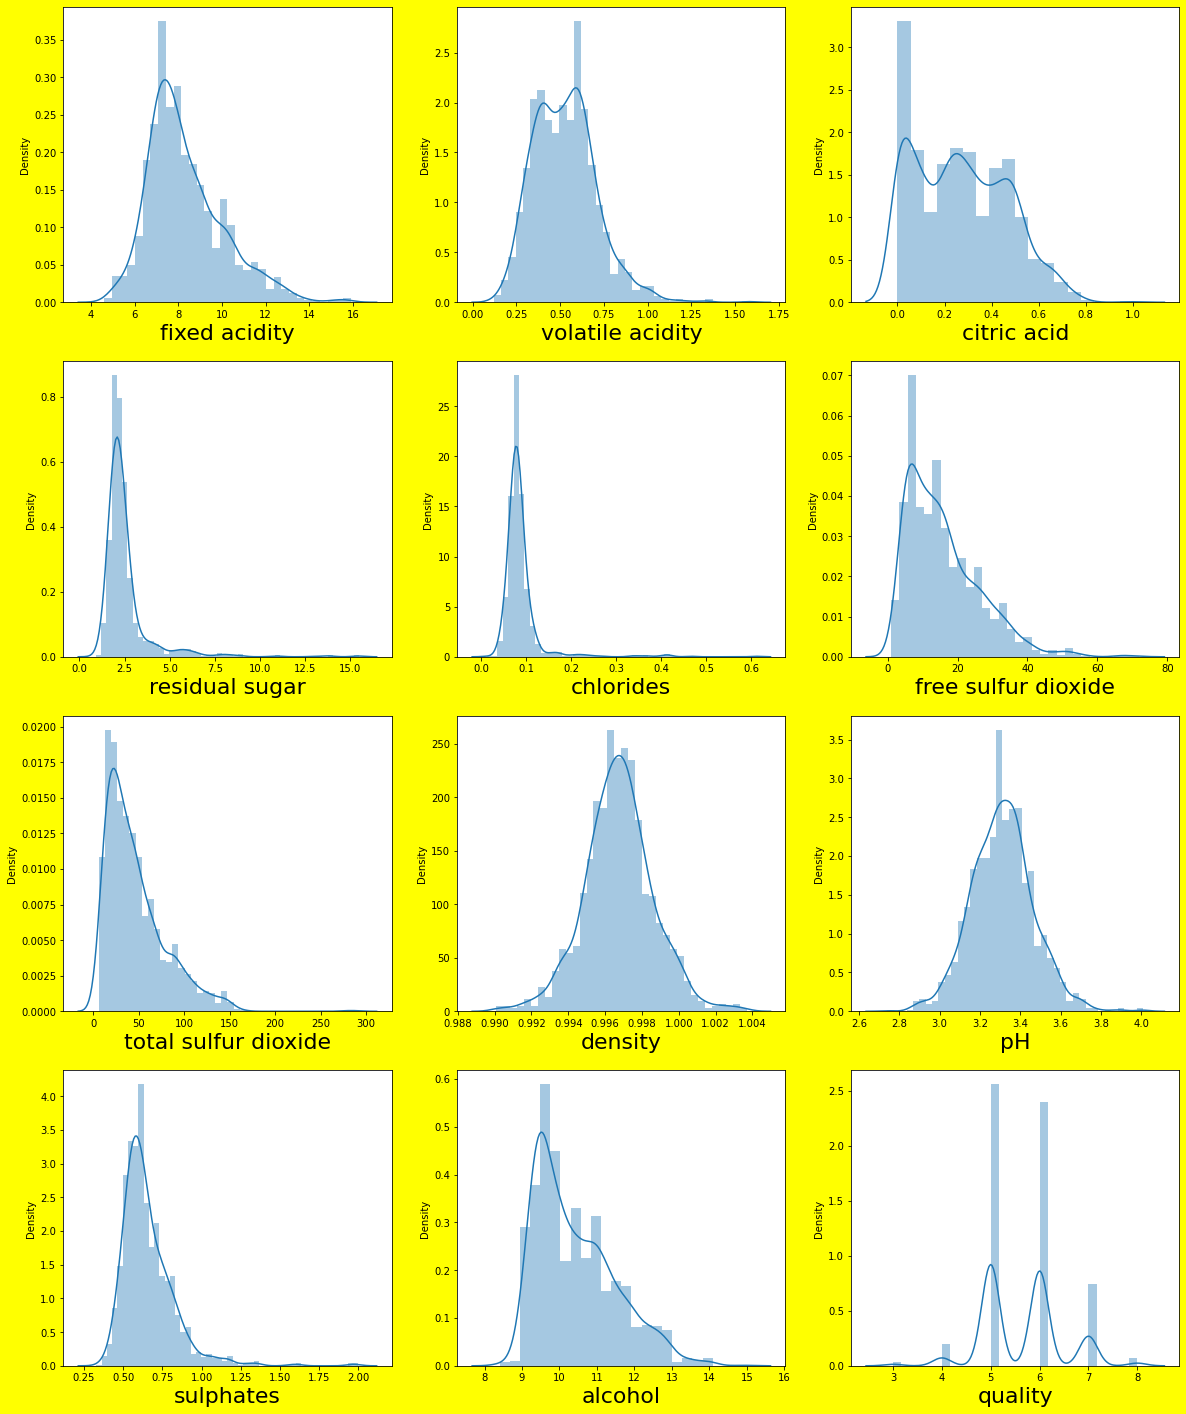

In [5]:
#Normal distribution plot
plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 22)
        
    plotnumber +=1
plt.show()

In [6]:
x = data.drop(columns = ['quality'])
y = data['quality']

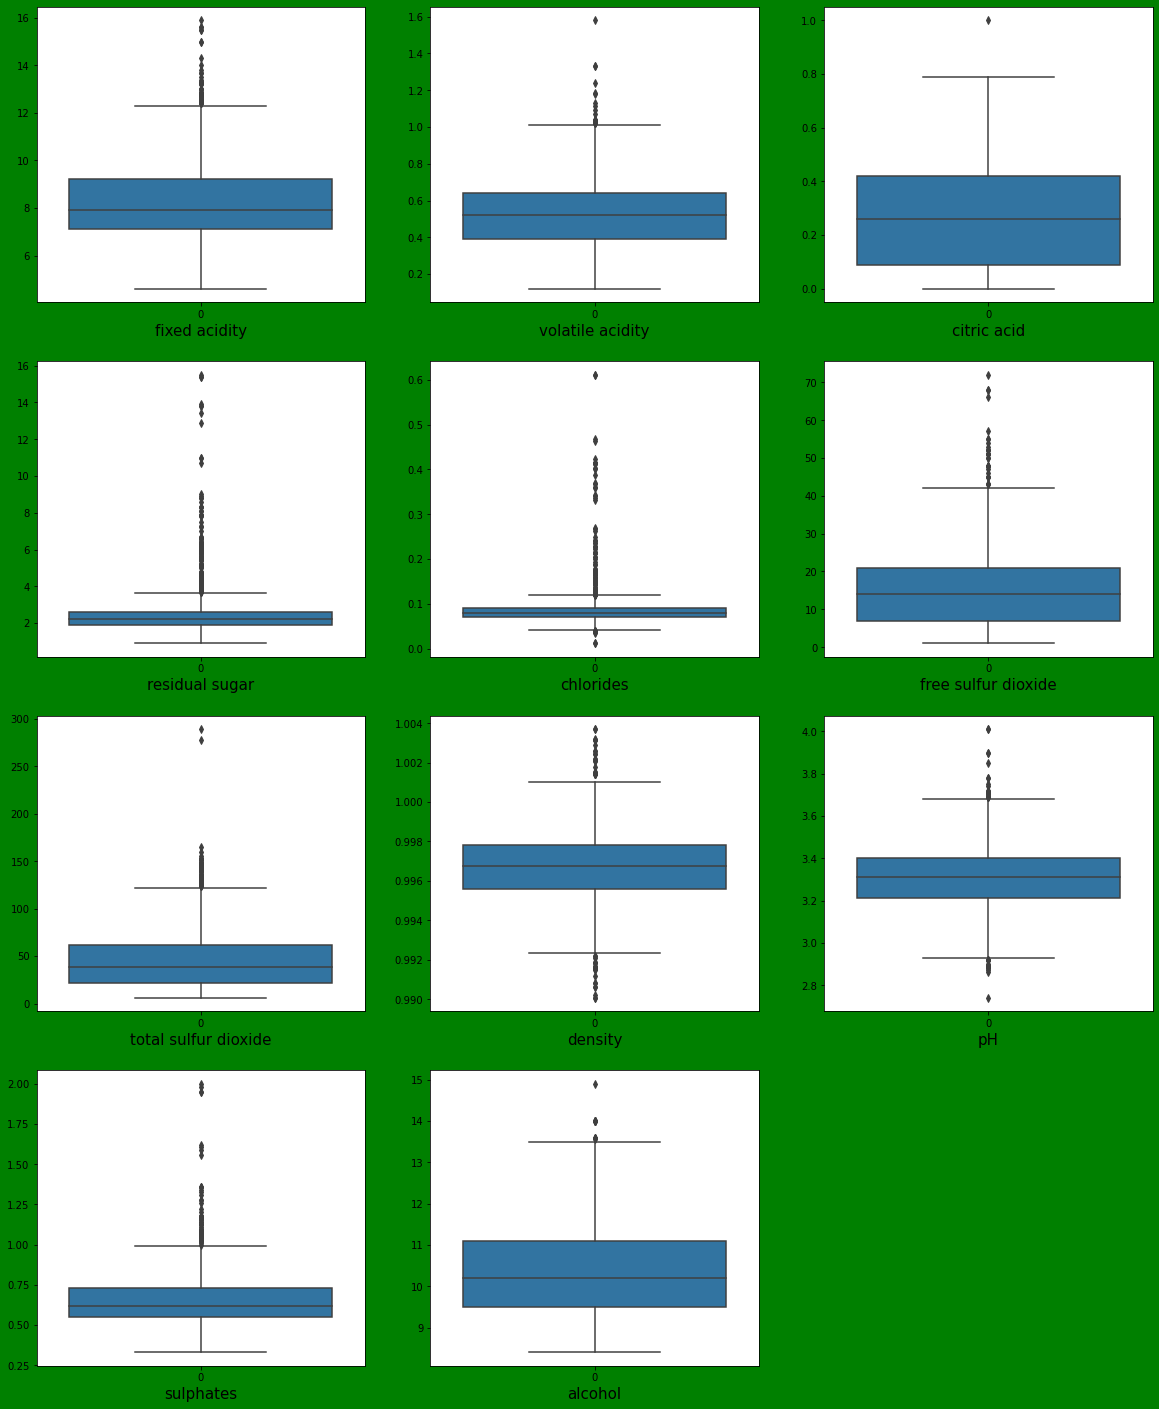

In [9]:
# box plotting to check outliers
plt.figure(figsize = (20, 25), facecolor = 'green')
graph = 1

for column in x:
    if graph <=12:
        plt.subplot(4, 3, graph)
        ax = sns.boxplot(data = x[column])
        plt.xlabel(column, fontsize = 15)
        
    graph +=1
plt.show()

In [10]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [11]:
from scipy.stats import zscore
import numpy as np

In [13]:
z = np.abs(zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [14]:
z.shape

(1599, 12)

In [15]:
type(z)

pandas.core.frame.DataFrame

In [16]:
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [18]:
z.iloc[13]

fixed acidity           0.298547
volatile acidity        0.459094
citric acid             0.097691
residual sugar          0.666062
chlorides               0.563935
free sulfur dioxide     0.657454
total sulfur dioxide    0.531178
density                 0.346269
pH                      0.331177
sulphates               5.322101
alcohol                 1.241848
quality                 0.787823
Name: 13, dtype: float64

In [19]:
len(np.where(z>3)[0])

192

In [21]:
d_new = data[(z<2.5).all(axis = 1)]

In [22]:
d_new.shape

(1321, 12)

In [23]:
data.shape[0] - d_new.shape[0]

278

In [26]:
# Percentage loss

d_new.shape[0]/len(data.shape[0]*100)

TypeError: object of type 'int' has no len()

In [27]:
#it consists of too many outliers.. Now we have to remove those outliers
q1 = x.quantile(0.25)

In [28]:
from scipy.stats import zscore
import numpy as np

In [30]:
z_score = zscore(data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 2.5).all(axis = 1)

data1 = data[filtering_entry]

data1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,8.238743,0.520890,0.255355,2.329432,0.081214,14.888556,42.133134,0.996672,3.320658,0.640329,10.382411,5.637996
std,1.541651,0.163572,0.185676,0.742535,0.019501,8.922168,26.770570,0.001618,0.134852,0.125398,0.970746,0.777100
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992200,2.940000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.080000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,35.000000,0.996680,3.320000,0.620000,10.200000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.089000,20.000000,56.000000,0.997610,3.400000,0.710000,11.000000,6.000000
max,12.600000,0.975000,0.740000,6.000000,0.200000,42.000000,128.000000,1.001000,3.690000,1.080000,13.000000,8.000000


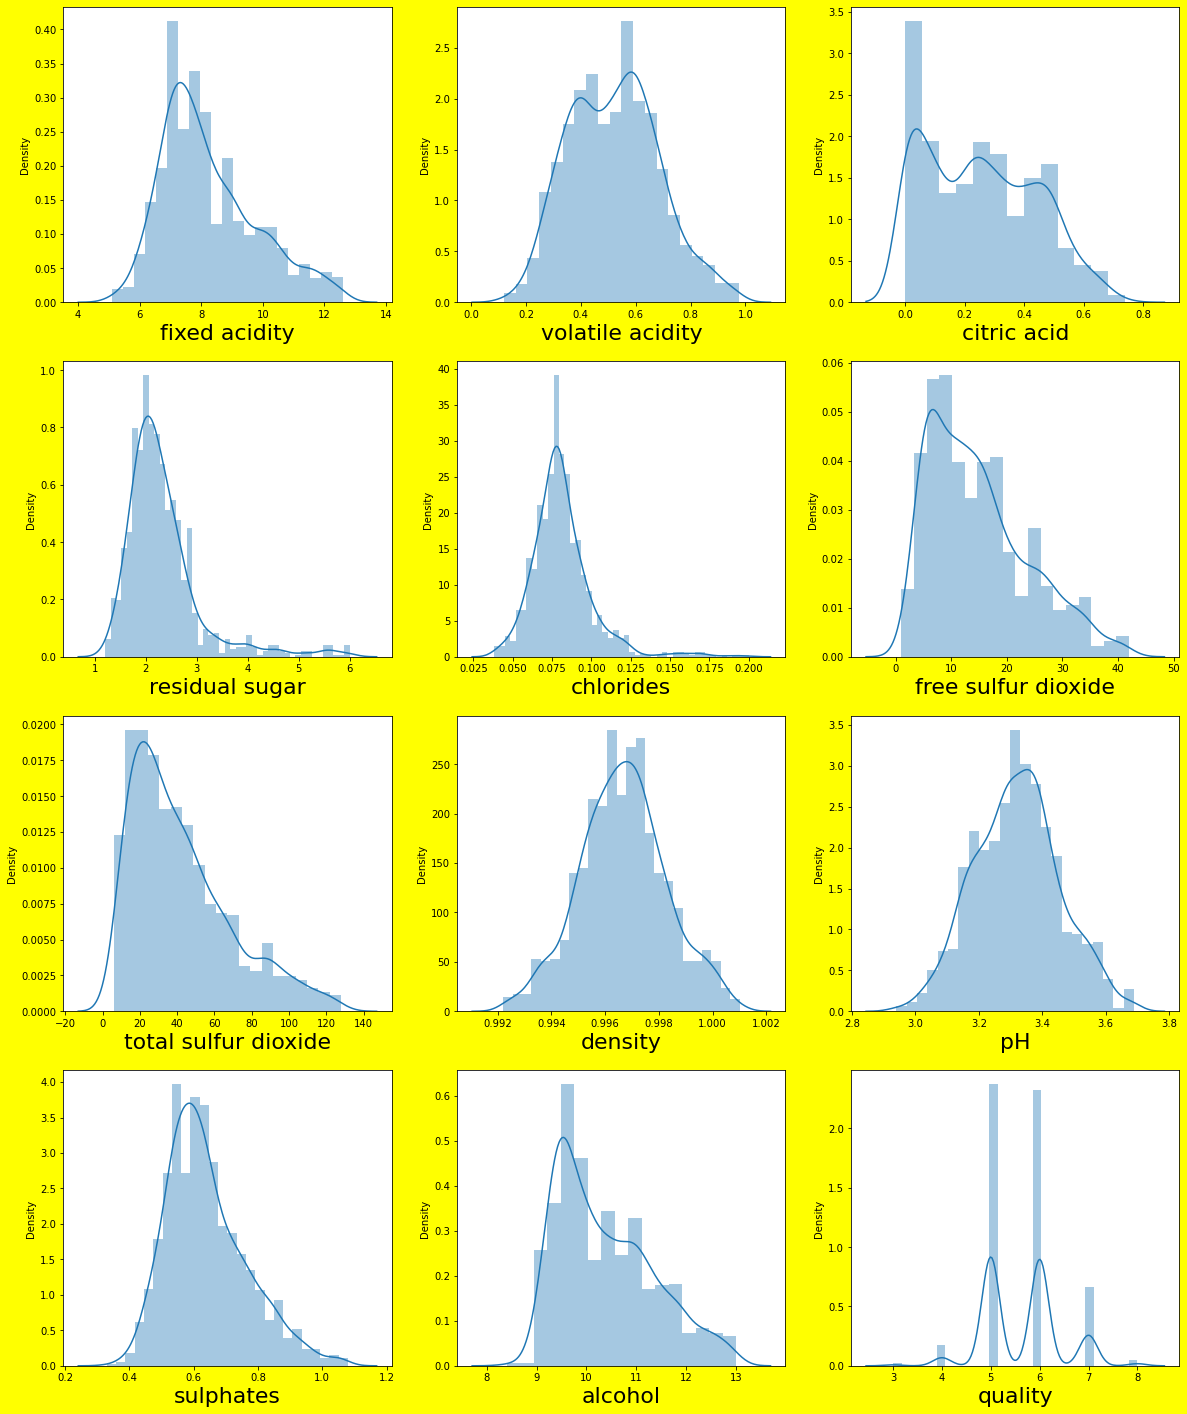

In [31]:
# now lets againg plot the distribution plot

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1

for column in data1:
    if plotnumber <=12:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column, fontsize = 22)
        
    plotnumber +=1
plt.show()

In [34]:
x = data1.drop(columns = ['quality'])
y = data1['quality']

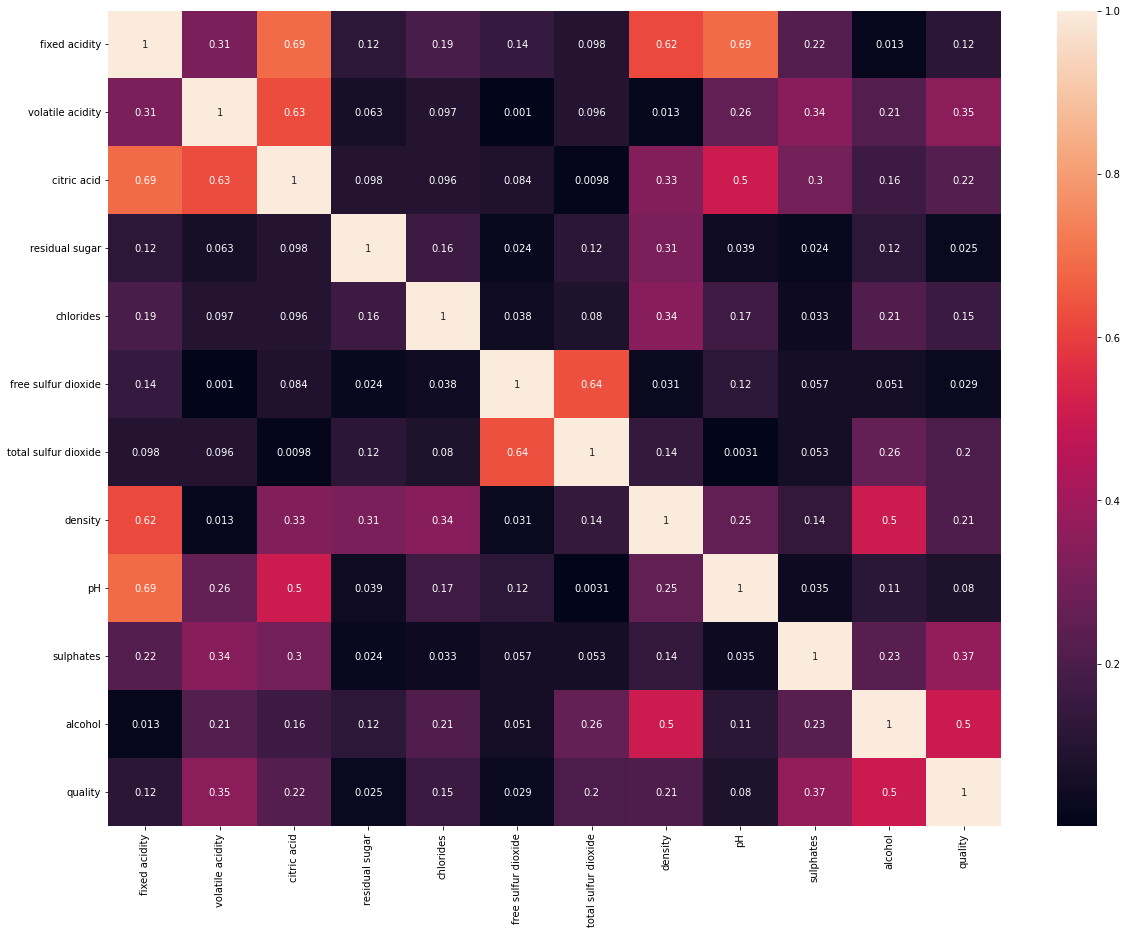

In [35]:
df_corr = data1.corr().abs()

plt.figure(figsize =(20, 15))
sns.heatmap(df_corr, annot = True, annot_kws= {'size':10})
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
# abschecking multi-collinearity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [39]:
X_scaled.shape

(1337, 11)

In [43]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['FEATURES'] = x.columns
vif

,VIF,FEATURES
0,7.056556,fixed acidity
1,2.017076,volatile acidity
2,3.264291,citric acid
3,1.524717,residual sugar
4,1.182309,chlorides
5,1.854773,free sulfur dioxide
6,2.078139,total sulfur dioxide
7,5.802227,density
8,3.031128,pH
9,1.313213,sulphates


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [44]:
#accuracy using decesion tree classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
clf.score(x_train, y_train)

1.0

In [46]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6358208955223881

In [47]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6358208955223881

In [50]:
conf_mat = confusion_matrix(y_test, y_pred)

In [51]:
conf_mat

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   3,   3,   0,   0],
       [  0,   4, 105,  39,   4,   0],
       [  0,   4,  30,  89,  10,   0],
       [  0,   1,   3,  15,  18,   3],
       [  0,   0,   0,   0,   1,   1]], dtype=int64)

In [10]:
#Now lets tune it
grid_param = {
    'criterion':['gini', 'entropy'],
    'max_depth': range(5, 10),
    'min_samples_leaf':range(2, 5),
    'min_samples_split':range(2, 5),
    'max_leaf_nodes': range(2, 10)
}

In [11]:
grid_search = GridSearchCV(estimator = clf, param_grid = grid_param, cv = 5, n_jobs = -1)

In [12]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 10),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(2, 5)})

In [13]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [22]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth = 50, min_samples_split = 7, min_samples_leaf = 10, max_leaf_nodes = 9)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, max_leaf_nodes=9, min_samples_leaf=10,
                       min_samples_split=7)

In [23]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.5425

In [ ]:
#Now random forest classifier
    

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [57]:
rf = RandomForestClassifier()

params = {
    'n_estimators':[11,15],
    'criterion':['gini', 'entropy'],
    'max_depth': range(5, 15),
    'min_samples_leaf':range(2, 12),
    'min_samples_split':range(2, 9),
    'max_leaf_nodes': range(2, 10)
}

In [58]:
grd = GridSearchCV(clf, param_grid = params)


ValueError: Invalid parameter n_estimators for estimator DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2, min_samples_leaf=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [59]:
grd.fit(x_train, y_train)
print('Best params = ', grd.best_params_)



ValueError: Invalid parameter n_estimators for estimator DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2, min_samples_leaf=2). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
rf = grd.best_estimator_

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [57]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.6149253731343284

In [58]:
rf_conf_mat = confusion_matrix(y_test, y_pred)

print('\n confusion matrix = ', '\n', rf_conf_mat)

print('\n Accuracy Report', '\n', accuracy_score(y_test, y_pred))


 confusion matrix =  
 [[  0   0   1   1   0   0]
 [  0   0   4   2   0   0]
 [  0   0 117  35   0   0]
 [  0   0  44  89   0   0]
 [  0   0   3  37   0   0]
 [  0   0   0   2   0   0]]

 Accuracy Report 
 0.6149253731343284
